# Vorlesung 04 - Computational Thinking
**Prof. Dr.-Ing. Martin Hobelsberger, Dr. Benedikt Zönnchen**

## 4 Schleifen

Viele Aufgaben, die wir über unser Leben hinweg verrichten sind langweilig, da wir immer und immer wieder die gleichen Basisschritte wiederholen müssen. 

Nehmen Sie nur das Nachschlagen einer Telefonnummer im Telefonbuch (falls Sie so etwas überhaupt noch kennen). Wir gehen dabei Seite für Seite durch und suchen nach einem bestimmten Namen - langweilig ...

Auch ganz alltägliche Dinge wie der Abwasch, Zähneputzen, Kochen, ja nahezu jede Aktion beinhaltet die eine oder andere Art der Wiederholung.

Wie sich gezeigt hat, können wir interessanterweise durch diese langweiligen Wiederholungen ganz erstaunliche Dinge vollbringen. **Wiederholung ist die Grundlage aller Berechnung.**

### 4.1 Beispiel / Motivation

Lassen Sie uns einmal zurück zu unseren Roboter blicken.

In [1]:
import roboworld as rw

Die Folgende Welt enthält unseren Roboter (türkis), das Ziel (gelb), begehbare Zellen (lila) und unbegehbare Hindernisse (blau).

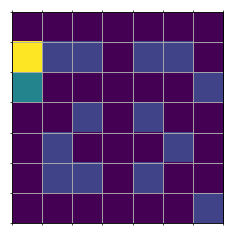

In [2]:
world = rw.complex_maze(nrows=7, ncols=7)
world.show()

Wir sollen nun einen Algorithmus entwerfen, welcher den Roboter zum Ziel führt (sofern dies möglich ist).
Diese Aufgabe scheint überwältigend schwierig.

In [3]:
import random as rnd

def random_move(robo):
    turns = rnd.choice([0,1,2,3])
    for _ in range(turns):
        robo.turn_left()
    if not robo.is_wall_in_front():
        robo.move()

In [4]:
robo = world.get_robo()
robo.disable_print()
while not robo.is_at_goal():
    random_move(robo)

In [5]:
rw.animate(world)

MovieWriter imagemagick unavailable; using Pillow instead.


**Wiederholung** trennt den Aufwand zum Lösen einer Aufgabe von der Komplexität des Codes. Eine Berechnung kann enorm aufwendig sein und dennoch benötigen wir wenig Denkarbeit (wenig Code) um einen Algorithmus für die Lösung zu entwerfen!

### 4.2 Die For-Schleife

Die ``for``-Schleife verwenden wir immer dann, wenn wir (zur Laufzeit) wissen wie viele Wiederholungen wir **maximal** benötigen.
Dabei wollen wir entweder

1. für eine bestimmte Anzahl $n \in \mathbb{N}$, oder
2. **für jedes Element einer Datenstruktur** 

einen Befehlsblock ausführen.

Im zweiten Fall spricht man auch von der Foreach-Schleife.
Durch den Zahlenbereich ``range()`` reduziert ``Python`` den ersten Fall auf den zweiten.

#### Die klassische For-Schleife (Fall 1)

```python
n = ...
for i in range(n):
    # Codeblock
```

Der Name der *Zählervariable* (hier ``i``) kann frei gewählt werden, allerdings verwendet man für Fall 1 gewöhnlich: ``i``, ``j`` oder ``k``.

In [6]:
for i in range(10):
    print(i**2)

0
1
4
9
16
25
36
49
64
81


#### Die Foreach-Schleife (Fall 2)

```python
sequenz = ... # some Sequenz of Elements
for element in sequenz:
    # Codeblock
```

Der Name mit dem wir die Elemente der Sequenz ansprechen (hier ``element``) kann frei gewählt werden und sollte beschreiben über welche Elemente wir *iterieren*.

In [7]:
names = ['Sarah', 'Sebastian', 'Babar', 'Simon', 'Martin']

for name in names:
    print(name)

Sarah
Sebastian
Babar
Simon
Martin


``range()`` ist, wie eine Liste und ein Tupel, auch eine *Sequenz*. Eine ``for``-Schleife läuft über die Einträge einer *Sequenz* oder anderer *iterierbarer* Strukturen.

***
***Übung 1.*** (Wortfilter)

Schreiben Sie eine Funktion ``filter_words(text, char)`` das aus einer Zeichenkette die Wörter, welche mit einem einzugebenden Buchstaben beginnen, herausfiltert und als Liste zurückgibt. **Hinweis:** verwenden Sie ``str.split()``.

In [8]:
text = 'Das ist ein Text den ich geschrieben habe. Er ist nicht sonderlich einfallsreich.'
def filter_words(text, char):
    words = text.split(' ')
    result = []
    for word in words:
        if word[0] == char:
            result.append(word)
    return result
filter_words(text, 'e')

['ein', 'einfallsreich.']

***

Es kann durchaus sein, dass wir die ``for``-Schleife auch dann verwenden wenn nicht genau klar ist wie viele Wiederholungen wir benötigen, sondern nur wissen wie viele wir maximal benötigen.

Nehmen wir den Test ob eine Zahl ``n`` eine Primzahl ist, als Beispiel:

In [9]:
def is_prime(n):
    prime = True
    for i in range(2, n):
        if n % i == 0:
            prime = False
            break
    return prime

print(is_prime(2))
print(is_prime(13))
print(is_prime(25))
print(is_prime(83))

True
True
False
True


Um die ``for``-Schleife frühzeitig zu beenden verwenden wir ``break``.
Mit ``break`` springen wir aus der **innersten** Schleife heraus.
Wir könnten stattdessen auch ``return`` verwenden um aus der Funktion herauszuspringen:

In [10]:
def is_prime(n):
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

print(is_prime(2))
print(is_prime(13))
print(is_prime(25))
print(is_prime(83))

True
True
False
True


Eine weitere Steuermöglichkeit bietet ``continue``.
Mit ``continue`` springen wir nicht aus der Schleife heraus sondern springen zurück zum Schleifenkopf:

In [11]:
def double_even_numbers(numbers):
    result = []
    for number in numbers:
        if number % 2 == 1:
            continue
            
        print(number)
        result.append(number*2)
    return result
numbers = list(range(10))
double_even_numbers(numbers)

0
2
4
6
8


[0, 4, 8, 12, 16]

Allerdings braucht man ``continue`` so gut wie nie und wenn es verwendet wird handelt es sich oftmals um schlecht leserlichen Code.

In [12]:
def double_even_numbers(numbers):
    result = []
    for number in numbers:
        if number % 2 == 0:    
            print(number)
            result.append(number*2)
    return result
numbers = list(range(10))
double_even_numbers(numbers)

0
2
4
6
8


[0, 4, 8, 12, 16]

**Faustregel:** Gehen Sie sparsam mit ``break`` und ``continue`` um, oftmals brauchen Sie es nicht!

### 4.3 Die While-Schleife

Die ``while``-Schleife verwenden wir immer dann, wenn wir (zur Laufzeit) **nicht** wissen wie viele Wiederholungen wir maximal benötigen.

Die Wiederholung endet sobald eine bestimmte Bedingung, d.h. ein *logischer Ausdruck* ``P`` ``False`` ergibt.

```python
while P:
    # Codeblock1
else:
    # Codeblock2
```

``Codeblock2`` wird ausgeführt sobald ``P`` ``False`` ergibt und die While-Schleife verlassen wird, d.h. als letzter Schritt.

**Vorsicht:** Wird ``P`` niemals ``False`` endet die Wiederholung niemals und wir haben eine sog. **Endlosschleife**!

In [13]:
i = 0
while i < 10:
    i += 1
    print(i)
else:
    print('end of the while-loop')

1
2
3
4
5
6
7
8
9
10
end of the while-loop


Wir können jede For-Schleife in eine While-Schleife transformieren.

In [14]:
names = ['Sarah', 'Sebastian', 'Babar', 'Simon', 'Martin']

for name in names:
    print(name)

print()

i = 0
while i < len(names):
    print(names[i])
    i += 1

Sarah
Sebastian
Babar
Simon
Martin

Sarah
Sebastian
Babar
Simon
Martin


While-Schleifen sind mächtiger aber auch gefährlicher bzw. oftmals schwerer zu lesen und zu verstehen als For-Schleifen.

**Faustregel:** Verwenden Sie die While-Schleife nur wenn die For-Schleife ungeeignet ist.

``break`` und ``continue`` funktionieren für die While-Schleife genauso wie für die For-Schleife.

**Faustregel:** Gehen Sie sparsam mit ``break`` und ``continue`` um, oftmals brauchen Sie es nicht!

In [15]:
# Schlechter Code!!!
i = 0
while i < 10:
    i += 1
    if i % 2 == 0:
        continue
    print(i)

1
3
5
7
9


In [16]:
# Besser!
i = 0
while i < 10:
    i += 1
    if i % 2 == 1:
        print(i)

1
3
5
7
9


In [17]:
# noch Besser!
i = 1
while i < 10:      
    print(i)
    i += 2

1
3
5
7
9


**Faustregel:** Prüfen Sie immer ob Ihre Bedingung ``P`` durch den Schleifenrumpf garantiert irgendwann ``False`` ergibt!

***
***Übung 2.*** Größter gemeinsamer Teiler (ggT)

Schreiben Sie eine Funktion ``gcd(m,n)`` zur Berechnung des größten geimeinsamen Teilers von ``m`` und ``n``.

* Gegeben seien zwei positive ganze Zahlen $m$ und $n$ (z. B.: Zähler und Nenner eines Bruchs)
* Finde ihren größten gemeinsamen Teiler, d.h. die größte positive ganze Zahl, die sowohl $m$ als auch $n$ ohne Rest teilt.
* Nutzen Sie hierfür eine While-Schleife und die Modulo Operation

*Euklids Algorithmus*

1. Berechne den Restwert der Division $m / n$ (Modulodivision). Sei dieser gleich $r$.
2. Setze $m \leftarrow n$, $n \leftarrow r$ und gehe zurück zu Schritt 1.
3. Falls $r = 0$ (und somit $n = 0$), so ist der Algorithmus beendet. Das Ergebnis (ggT) ist $m$. Ansonsten fahre fort.

In [18]:
def gcd(m, n):
    while n != 0:
        r = m % n
        m = n
        n = r
    return m
gcd(36, 24)

12

In [19]:
def gcd(m, n):
    while n != 0:
        m, n = n, m % n
    return m
gcd(36, 24)

12

***